# **"EMNIST Classification using Transfer Learning model of MNIST"**


### The purpose of this notebook is to sort Foot-Wear images in a folder based on their class/type

#### **Libraries Used:**

>tensorflow

>keras

>numpy

>matplotlib

>PIL

>seaborn

#### **How to use?**

>1. Train a CNN model on mnist

>2. Use the trained model to classify the images in the folder

>3. Save the model

>4. Use the trained model weights for Transfer Learning EMNIST


# +_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+

## **Train MNIST**

### **Importing Libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, BatchNormalization, Dropout, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

### **Load the mnist dataset**

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


### **Plot Sample data**

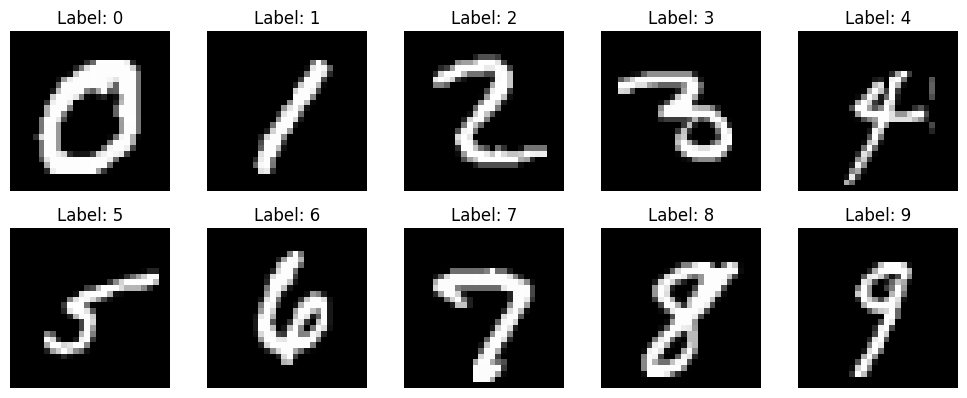

In [3]:
def plot_samples(x, y):
    plt.figure(figsize=(10, 10))
    for i in range(10):
        plt.subplot(5, 5, i + 1)
        idx = np.where(y == i)[0][:5]
        for j in range(5):
            plt.imshow(x[idx[j]], cmap='gray')
            plt.title(f'Label: {i}')
            plt.axis('off')
        plt.tight_layout()
    plt.show()

plot_samples(x_train, y_train)

### **Transforming the data for training**

In [4]:
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

### **Train-Test-Val Split**

In [5]:
x_val = x_train[:10000]
y_val = y_train[:10000]
x_train = x_train[10000:]
y_train = y_train[10000:]

print(f'Train samples: {len(x_train)}, Validation samples: {len(x_val)}, Test samples: {len(x_test)}')

Train samples: 50000, Validation samples: 10000, Test samples: 10000


### **Train CNN Model**

In [6]:
model = Sequential()
model.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(28, 28, 1)))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=5, strides=2, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=5, strides=2, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 26, 26, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 24, 24, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 24, 24, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 32)          │          25,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 12, 12, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 10, 10, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 10, 10, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 8, 8, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 8, 8, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 4, 4, 64)            │         102,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 4, 4, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         131,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │              

 Total params: 327,242 (1.25 MB)

 Trainable params: 326,410 (1.25 MB)

 Non-trainable params: 832 (3.25 KB)

In [7]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [9]:
# Train the model
history = model.fit(x_train, y_train, batch_size=128, epochs=10, validation_data=(x_val, y_val))

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 26s 32ms/step - accuracy: 0.8167 - loss: 0.6053 - val_accuracy: 0.4633 - val_loss: 1.9724
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9754 - loss: 0.0819 - val_accuracy: 0.9867 - val_loss: 0.0489
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.9829 - loss: 0.0546 - val_accuracy: 0.9853 - val_loss: 0.0480
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9862 - loss: 0.0439 - val_accuracy: 0.9865 - val_loss: 0.0487
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9870 - loss: 0.0406 - val_accuracy: 0.9878 - val_loss: 0.0431
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9899 - loss: 0.0328 - val_accuracy: 0.9907 - val_loss: 0.0336
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9911 - loss: 0.0290 - val_accuracy: 0.9928 - val_loss: 0.0292
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9911 - loss: 0.0290 - val_accurac

### **Accuracy and Loss Plots**

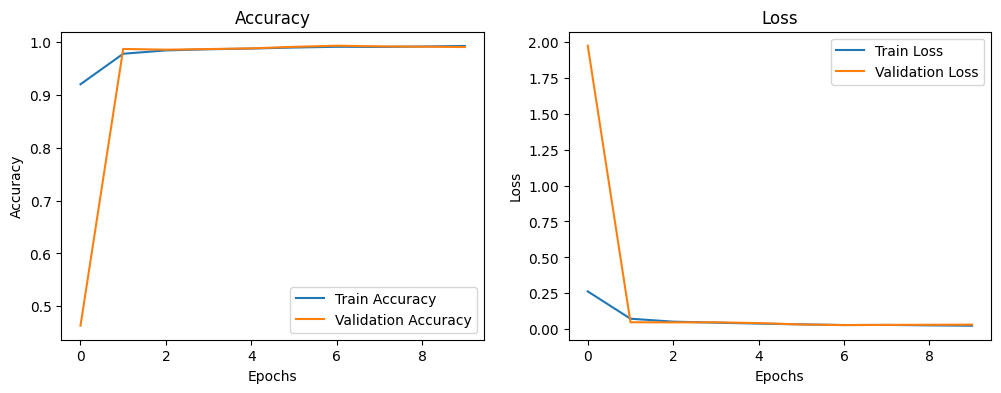

In [10]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### **Save Model**

In [11]:
model.save('mnist_model.h5')

### **Load Model**

In [12]:
loaded_model = load_model('mnist_model.h5')

### **Confusion Matrix**

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


<Figure size 1000x800 with 0 Axes>

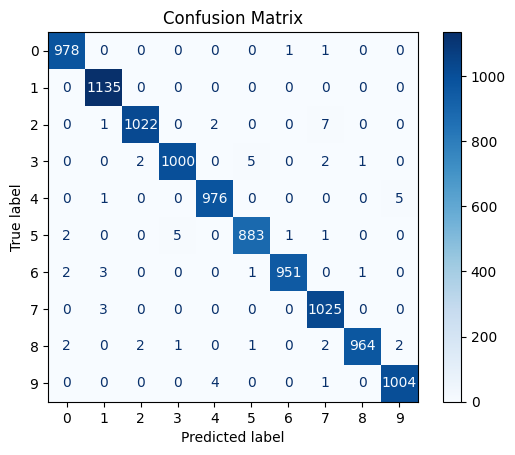

In [13]:
y_pred = loaded_model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(10, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(10))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

### **Accuracy on test data**

In [14]:
test_loss, test_accuracy = loaded_model.evaluate(x_test, y_test)
print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9901 - loss: 0.0340
Test Loss: 0.0230, Test Accuracy: 0.9938


### **Predictions**

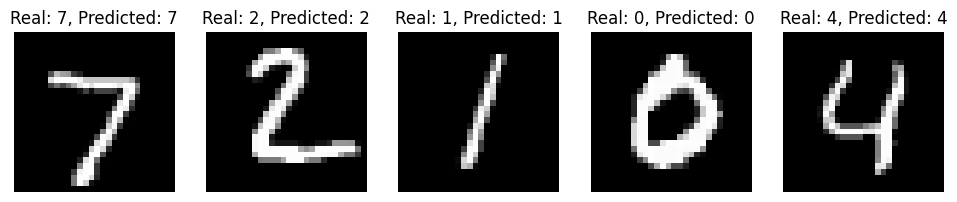

In [17]:
num_images = 5
plt.figure(figsize=(12, 12))
for i in range(num_images):
    plt.subplot(1, num_images, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f'Real: {np.argmax(y_test[i])}, Predicted: {y_pred_classes[i]}')
    plt.axis('off')
plt.show()

## **EMNIST Fine Tuning**

### **Mount Google Drive**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **Install Dependencies**

In [3]:
!pip install emnist

### **Unzip EMNIST dataset**

In [4]:
!mkdir -p ~/.cache/emnist/
!cp /content/drive/MyDrive/EMNIST_DATASET/emnist.zip ~/.cache/emnist/emnist.zip

### **Data Transformation and Train-Test_Val Split**

In [15]:
import numpy as np
from emnist import extract_training_samples, extract_test_samples
from tensorflow.keras.utils import to_categorical

x_train, y_train = extract_training_samples('byclass')
x_test, y_test = extract_test_samples('byclass')

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

x_train = x_train.reshape(-1, 28, 28, 1)  
x_test = x_test.reshape(-1, 28, 28, 1)   

y_train = to_categorical(y_train, num_classes=62)  # 62 classes for 'byclass'
y_test = to_categorical(y_test, num_classes=62)

print(f'Training data shape: {x_train.shape}')
print(f'Training labels shape: {y_train.shape}')
print(f'Test data shape: {x_test.shape}')
print(f'Test labels shape: {y_test.shape}')

Training data shape: (697932, 28, 28, 1)
Training labels shape: (697932, 62)
Test data shape: (116323, 28, 28, 1)
Test labels shape: (116323, 62)


### **Display EMNIST dataset**

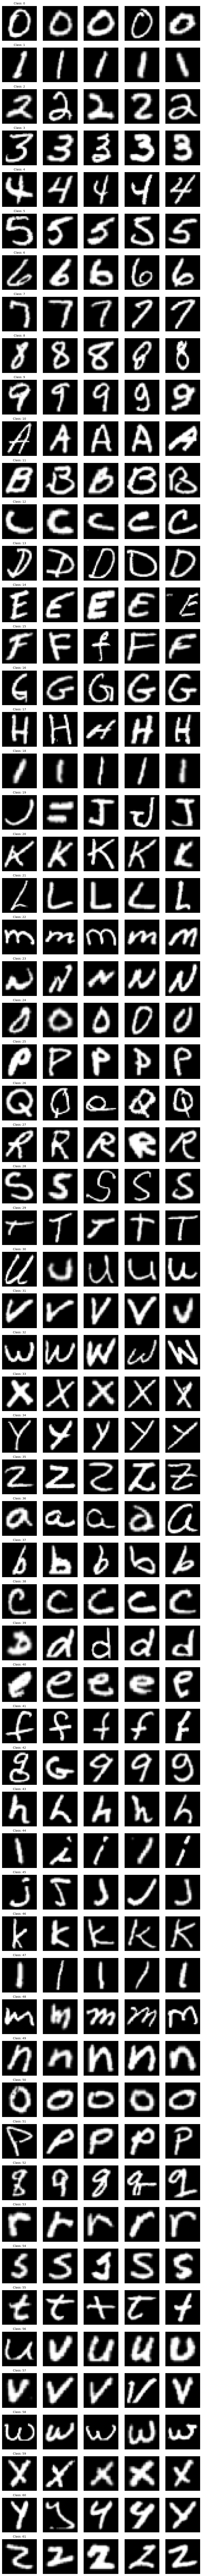

In [10]:
def plot_samples(x, y, num_samples_per_class=5, image_size=(28, 28)):
    num_classes = len(np.unique(y))  # Number of unique classes based on labels
    # Calculate subplot grid size
    fig_width = num_samples_per_class * 2  # Width of the figure
    fig_height = num_classes * 2  # Height of the figure

    plt.figure(figsize=(fig_width, fig_height))

    for class_idx in range(num_classes):
        class_samples = np.where(y == class_idx)[0]  # Find indices for the current class
        for sample_idx in range(num_samples_per_class):
            plt.subplot(num_classes, num_samples_per_class, class_idx * num_samples_per_class + sample_idx + 1)
            plt.imshow(x[class_samples[sample_idx]].reshape(image_size), cmap='gray')  # Reshape to 28x28 if necessary
            plt.axis('off')
            if sample_idx == 0:  # Only label the first sample of each class
                plt.title(f'Class: {class_idx}', fontsize=10)

    plt.tight_layout(pad=1.0)  # Adjust padding
    plt.show()

# Plot samples from the combined EMNIST training dataset
plot_samples(x_train, y_train)

### **Load the mnist model as previously trained**

In [16]:
mnist_model = load_model('mnist_model.h5')

### **Transfer Learning**

In [17]:
mnist_model.pop()

mnist_model.add(Dense(62, activation='softmax', name='output_dense_62'))

mnist_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 26, 26, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 24, 24, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 24, 24, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 32)          │          25,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 12, 12, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 10, 10, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 10, 10, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 8, 8, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 8, 8, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 4, 4, 64)            │         102,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 4, 4, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         131,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │              

 Total params: 333,952 (1.27 MB)

 Trainable params: 333,118 (1.27 MB)

 Non-trainable params: 832 (3.25 KB)

 Optimizer params: 2 (12.00 B)

In [18]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [19]:
history = model.fit(x_train, y_train, batch_size=32, epochs=10, validation_split=0.1)

Epoch 1/10
19630/19630 ━━━━━━━━━━━━━━━━━━━━ 107s 5ms/step - accuracy: 0.8384 - loss: 0.4772 - val_accuracy: 0.8580 - val_loss: 0.3852
Epoch 2/10
19630/19630 ━━━━━━━━━━━━━━━━━━━━ 88s 4ms/step - accuracy: 0.8592 - loss: 0.3824 - val_accuracy: 0.8669 - val_loss: 0.3543
Epoch 3/10
19630/19630 ━━━━━━━━━━━━━━━━━━━━ 89s 5ms/step - accuracy: 0.8647 - loss: 0.3637 - val_accuracy: 0.8714 - val_loss: 0.3449
Epoch 4/10
19630/19630 ━━━━━━━━━━━━━━━━━━━━ 89s 5ms/step - accuracy: 0.8668 - loss: 0.3539 - val_accuracy: 0.8704 - val_loss: 0.3458
Epoch 5/10
19630/19630 ━━━━━━━━━━━━━━━━━━━━ 149s 5ms/step - accuracy: 0.8691 - loss: 0.3503 - val_accuracy: 0.8740 - val_loss: 0.3419
Epoch 6/10
19630/19630 ━━━━━━━━━━━━━━━━━━━━ 88s 4ms/step - accuracy: 0.8702 - loss: 0.3447 - val_accuracy: 0.8731 - val_loss: 0.3385
Epoch 7/10
19630/19630 ━━━━━━━━━━━━━━━━━━━━ 142s 5ms/step - accuracy: 0.8712 - loss: 0.3420 - val_accuracy: 0.8713 - val_loss: 0.3379
Epoch 8/10
19630/19630 ━━━━━━━━━━━━━━━━━━━━ 88s 4ms/step - accurac

### **Accuracy and Loss Plots**

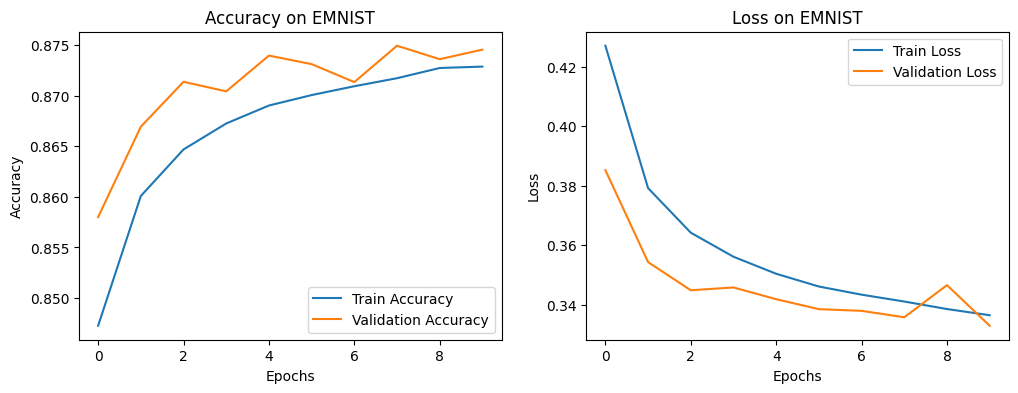

In [20]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy on EMNIST')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss on EMNIST')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### **Save Model**

In [21]:
model.save('emnist_model.h5')

### **Load Model**

In [22]:
loaded_model = load_model('emnist_model.h5')

### **Accuracy on test dataset**

In [26]:
test_loss, test_accuracy = loaded_model.evaluate(x_test, y_test)
print(f'Test Loss on EMNIST: {test_loss:.4f}, Test Accuracy on EMNIST: {test_accuracy:.4f}')

3636/3636 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8755 - loss: 0.3321
Test Loss on EMNIST: 0.3296, Test Accuracy on EMNIST: 0.8767


### **Predictions**

3636/3636 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step


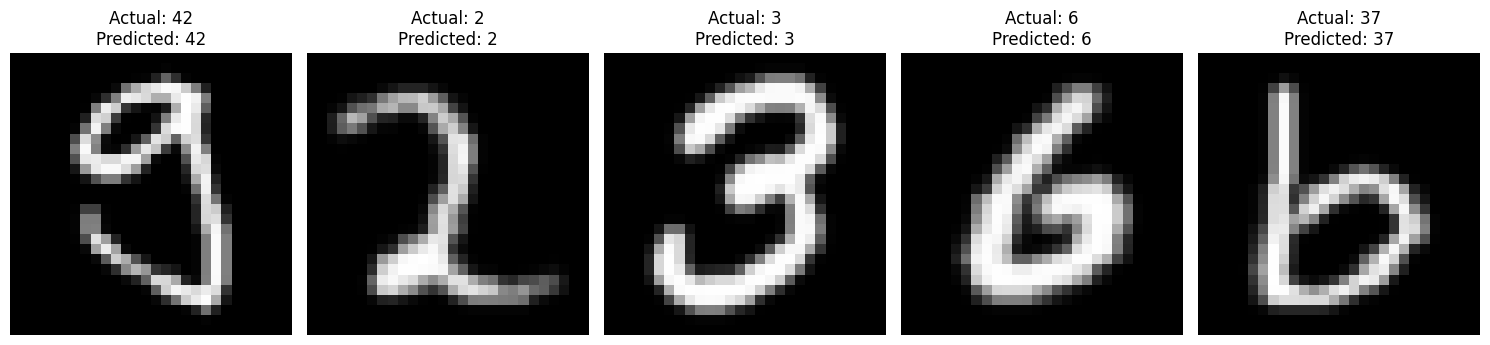

In [29]:
predictions = loaded_model.predict(x_test)

predicted_labels = np.argmax(predictions, axis=1)

num_images = 5
random_indices = np.random.choice(x_test.shape[0], num_images, replace=False)

plt.figure(figsize=(15, 6))
for i, idx in enumerate(random_indices):
    plt.subplot(1, num_images, i + 1)
    plt.imshow(x_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f'Actual: {np.argmax(y_test[idx])}\nPredicted: {predicted_labels[idx]}')
    plt.axis('off')

plt.tight_layout()
plt.show()